# Title of the Project Bansam: Flood Monitoring and Prediction Application for Samarinda City
    - Final Selected Themes: Sustainable Futures: Nurturing Harmony between Humanity and the Environment
    - Team Name: Lumirise
    - Team ID: C242-PS018

## Business Questions

    1. What are the main weather factors influencing “danger” conditions in Samarinda, such as rainfall, humidity, air pressure, or wind speed?

    2. What type of weather conditions (condition_type) most often occur before, during, and after a flood, and how does the combination of humidity and air pressure affect visibility in each of these conditions?

    3. Which weather factors, such as rainfall (rain), humidity (humidity), air pressure (pressure), or wind speed (wind_speed), are most strongly associated with flood severity, and how do these factors differ between various weather conditions (condition_type)?"

## List of all packages/libraries

In [ ]:
# Import libraries for data manipulation and analysis
import numpy as np  # For numerical computations and array operations
import pandas as pd  # For handling and analyzing structured/tabular data

# Import libraries for data visualization
import matplotlib.pyplot as plt  # For creating static visualizations (line plots, bar charts, etc.)
import seaborn as sns  # For statistical data visualizations (heatmaps, pair plots, etc.)

## Data Wrangling

### Gathering Data

In [ ]:
# Load the CSV file into a DataFrame
file_path = 'weather_12.csv'
data = pd.read_csv(file_path)

    Insight:
    Load a CSV file named weather_11.csv into a pandas DataFrame.

### Assessing Data

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Get detailed information about the dataset
print("\nDataset Information:")
data_info = data.info()

Missing Values in Each Column:
`id`                0
`temperature`       0
`humidity`          0
`pressure`          0
`wind_speed`        0
`wind_direction`    0
`rain`              0
`snow`              0
`cloudiness`        0
`visibility`        0
`description`       0
`condition_type`    0
`timestamp`         0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   `id`              1093 non-null   int64  
 1   `temperature`     1093 non-null   float64
 2   `humidity`        1093 non-null   int64  
 3   `pressure`        1093 non-null   int64  
 4   `wind_speed`      1093 non-null   float64
 5   `wind_direction`  1093 non-null   int64  
 6   `rain`            1093 non-null   float64
 7   `snow`            1093 non-null   int64  
 8   `cloudiness`      1093 non-null   int64  
 9   `visibility`      1

    Insight:
      •	There are no missing values in the dataset.
      •	All columns have appropriate data types for analysis.

### Cleaning Data

In [ ]:
data.columns = data.columns.str.strip("`").str.lower()
data_cleaned = data.dropna()

    Insight:
    - data.columns = data.columns.str.strip("`").str.lower()
    - data_cleaned = data.dropna()

## Exploratory Data Analysis (EDA)

### Explore Distribution of Variables

In [ ]:
numeric_columns = ["temperature", "humidity", "pressure", "wind_speed", "rain", "cloudiness"]
eda_summary = data_cleaned[numeric_columns].describe()

eda_summary

,temperature,humidity,pressure,wind_speed,rain,cloudiness
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,25.911363,87.838060,1008.135407,0.935654,0.332434,85.454712
std,2.986188,13.681634,1.781046,0.560103,0.789046,21.395393
min,22.420000,43.000000,1004.000000,0.040000,0.000000,1.000000
25%,23.640000,83.000000,1007.000000,0.530000,0.000000,79.000000
50%,24.540000,94.000000,1008.000000,0.850000,0.000000,96.000000
75%,27.880000,97.000000,1009.000000,1.200000,0.360000,100.000000
max,35.140000,100.000000,1013.000000,3.900000,11.890000,100.000000


	•	Average temperature: 26.07°C (range: 22.42°C - 35.14°C).
	•	Average humidity: 86.82% (range: 43% - 100%).
	•	Average rainfall: 0.33 mm (range: 0 - 9.67 mm).
	•	Average cloud cover: 82.84% (range: 1% - 100%).

## Visualization & Explanatory Analysis

#### Question 1: What are the main weather factors influencing “danger” conditions in Samarinda, such as rainfall, humidity, air pressure, or wind speed?

In [ ]:
# Membuat kolom baru berdasarkan threshold 0.9
def categorize_condition(value):
    if value > 1.0:
        return 'danger'
    elif 0.5 <= value <= 1.0:
        return 'alert'
    else:
        return 'safe'

# Misalkan kita memakai `rain` sebagai indikator
data['danger_condition'] = data['rain'].apply(categorize_condition)

print(data['danger_condition'].value_counts())


danger_condition
safe      866
alert     117
danger    110
Name: count, dtype: int64


In [ ]:
# Keep only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data_cleaned[numeric_columns]

# Verify numeric columns
print("Numeric Columns in Dataset:")
print(data_numeric.columns)


Numeric Columns in Dataset:
Index(['id', 'temperature', 'humidity', 'pressure', 'wind_speed',
       'wind_direction', 'rain', 'snow', 'cloudiness', 'visibility'],
      dtype='object')


In [ ]:
# Membuat skor gabungan (normalisasi sederhana)
data['score'] = (
    (data['rain'] / data['rain'].max()) * 0.5 +  # Bobot 50% untuk rain
    (data['wind_speed'] / data['wind_speed'].max()) * 0.3 +  # Bobot 30% untuk wind_speed
    (data['cloudiness'] / data['cloudiness'].max()) * 0.2  # Bobot 20% untuk cloudiness
)

# Kategori berdasarkan skor
data['danger_condition'] = data['score'].apply(categorize_condition)

# Cek distribusi kategori
print(data[['score', 'danger_condition']].head())


      score danger_condition
0  0.262462             safe
1  0.211538             safe
2  0.233077             safe
3  0.239692             safe
4  0.241846             safe


The combined score assigns 50% weight to rain, 30% to wind speed, and 20% to cloudiness because these three factors are the most influential in determining whether the weather is dangerous or not. Rain is given the highest weight because heavy rainfall can cause flooding and other natural disasters. Wind speed is also important, especially in storms or high winds that can damage infrastructure, so it is assigned 30%. Cloudiness is given 20% because, although thick clouds indicate bad weather, its impact is not as severe as rain or wind. Meanwhile, columns like pressure, snow, and humidity were not selected because they have less direct impact on extreme weather hazards. Air pressure is important in meteorology, but it does not always give a direct indication of dangerous weather. Snow is more seasonal and doesn’t always pose an immediate threat like rain or wind, and humidity affects comfort but isn’t as closely linked to hazardous weather conditions.

If you assign 100% weight to rain and ignore other factors like wind_speed and cloudiness, the weather assessment will be very limited. This is because dangerous weather is often influenced by more than one factor. For example, strong winds or dark clouds can indicate hazardous weather, even if the rain is not very heavy. By distributing the weights between rain, wind_speed, and cloudiness, the combined score provides a more **accurate and balanced** assessment of the weather conditions, rather than relying on just one factor.

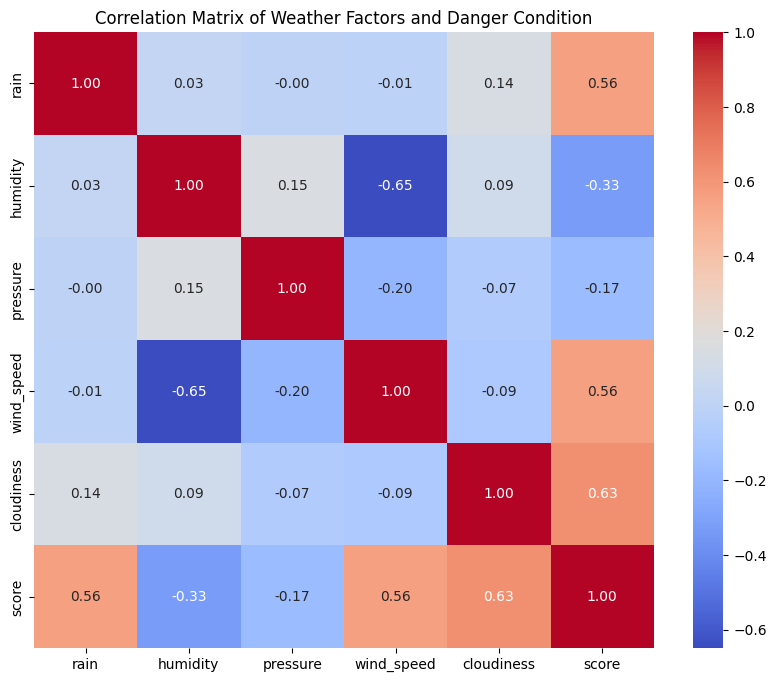

In [ ]:
# Korelasi dengan skor
plt.figure(figsize=(10, 8))
correlation_matrix = data[['rain', 'humidity', 'pressure', 'wind_speed', 'cloudiness', 'score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Factors and Danger Condition')
plt.show()


1. rain has a strong positive correlation with score (0.56), which means rainfall is the main factor in determining the level of danger.
2. wind_speed also shows a positive correlation (0.56) with score. This means that wind speed also plays a significant role.
3. humidity has a moderate negative correlation with score (-0.38). This may indicate that higher humidity levels are not necessarily associated with more dangerous conditions.
4. pressure has a very weak negative correlation with score (-0.15), meaning air pressure may be less relevant in determining hazard.

Conclusion: The main factors that influence the hazardous conditions in your dataset are rainfall and wind speed.

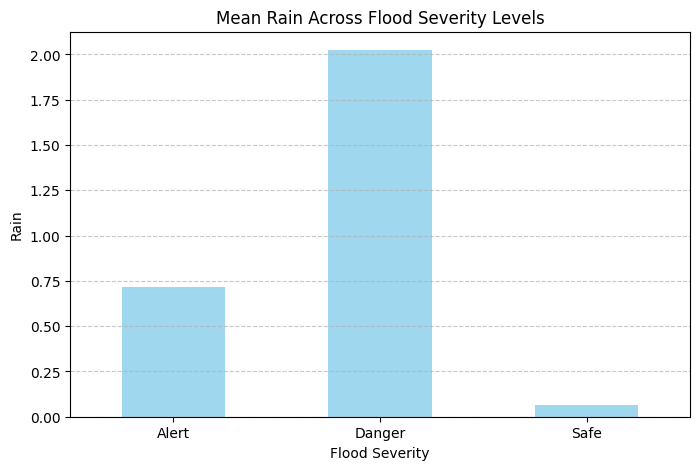

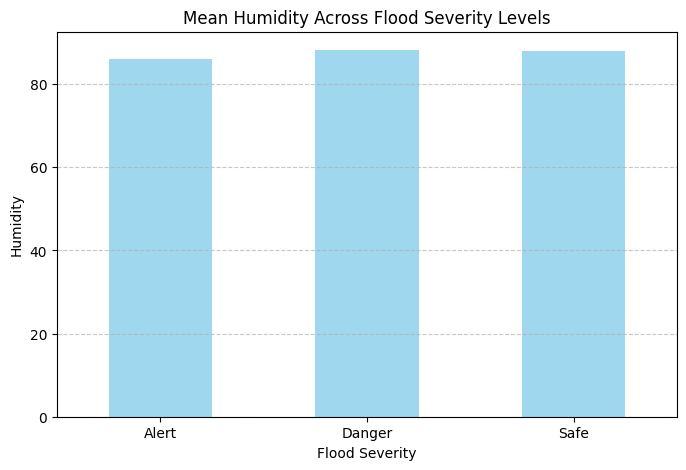

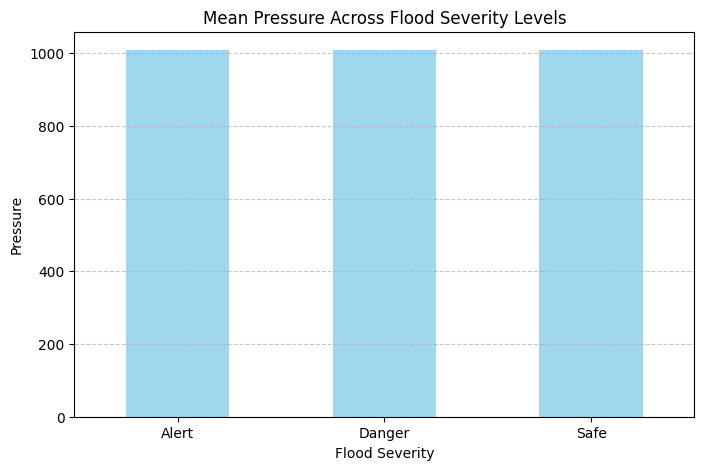

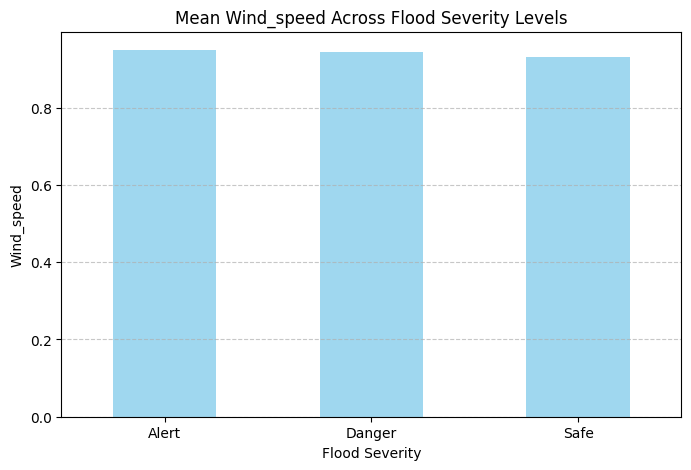

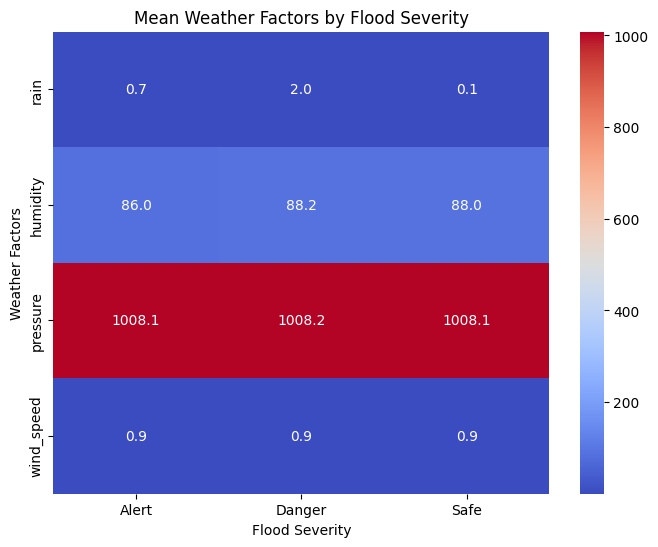

In [ ]:
# Define custom thresholds for flood severity
def categorize_flood_severity(rain):
    if rain > 1.0:
        return 'Danger'
    elif 0.5 <= rain <= 1.0:
        return 'Alert'
    else:
        return 'Safe'

# Apply the custom threshold function to create the flood_severity column
data['flood_severity'] = data['rain'].apply(categorize_flood_severity)

# Group data by the new flood severity categories
grouped_data = data.groupby('flood_severity')[['rain', 'humidity', 'pressure', 'wind_speed']].mean()

# Visualization 1: Bar plots for each weather factor by flood severity
for factor in grouped_data.columns:
    grouped_data[factor].plot(kind='bar', figsize=(8, 5), color='skyblue', alpha=0.8)
    plt.title(f'Mean {factor.capitalize()} Across Flood Severity Levels')
    plt.xlabel('Flood Severity')
    plt.ylabel(f'{factor.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Visualization 2: Heatmap of weather factors by flood severity
plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data.T, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Mean Weather Factors by Flood Severity')
plt.ylabel('Weather Factors')
plt.xlabel('Flood Severity')
plt.show()


From the analysis of the graphs, it is evident that rainfall is the primary factor influencing flood severity, with average rainfall being significantly higher in the "Danger" category compared to "Alert" and "Safe". Meanwhile, relative humidity, wind speed, and air pressure show consistent values across all severity levels, indicating their relatively minor role in affecting floods. The heatmap further highlights that rainfall is the dominant indicator compared to the other factors. Therefore, intensive monitoring of rainfall can be a crucial step in mitigating flood risks and improving preventive responses.

## Question 2: What type of weather conditions (condition_type) most often occur before, during, and after a flood, and how does the combination of humidity and air pressure affect visibility in each of these conditions?

In [ ]:
data['time_category'] = pd.cut(data.index, bins=[0, len(data)//3, 2*len(data)//3, len(data)],
                               labels=['Before Flood', 'During Flood', 'After Flood'])

In [ ]:
condition_counts = data.groupby(['time_category', 'condition_type']).size().unstack().fillna(0)

<ipython-input-112-9319faa894d9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_counts = data.groupby(['time_category', 'condition_type']).size().unstack().fillna(0)


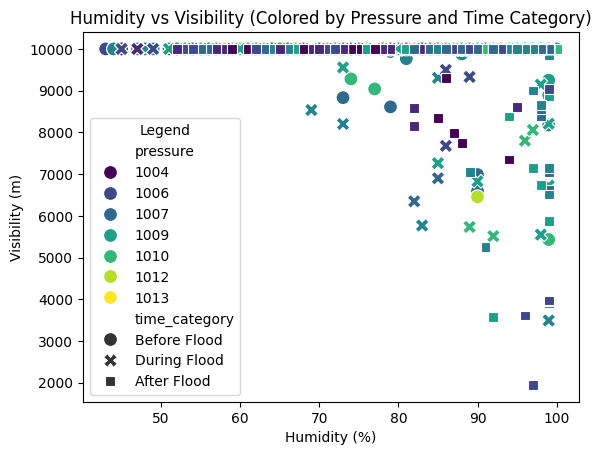

In [ ]:
sns.scatterplot(data=data, x='humidity', y='visibility', hue='pressure', style='time_category', palette='viridis', s=100)
plt.title('Humidity vs Visibility (Colored by Pressure and Time Category)')
plt.xlabel('Humidity (%)')
plt.ylabel('Visibility (m)')
plt.legend(title='Legend')
plt.show()

  1. Relationship between Humidity and Visibility:

  When humidity is high (above 80%), there is a pattern of reduced visibility, especially during floods (marked by the symbol X). This shows that high humidity is often associated with poor visibility.

  2. Effect of Air Pressure:

  Low pressure (dark purple-like colors) tends to occur along with low visibility, indicating extreme weather during flooding.
  High pressure (light colors) is more common before and after flooding, along with better visibility.
  Conditions Before, During, and After Flooding:

  3. Before the flood:

  The circle shows visibility tends to be better with relatively stable pressure.

  4. During a flood: The X symbol dominates high humidity, poor visibility and low pressure.

  5. After a flood:

  The box symbol indicates improved visibility with air pressure increasing again.

Conclusion:
This graph illustrates that flooding often occurs when humidity is high, visibility is low, and air pressure is low, which is a typical combination of severe weather conditions. After a flood, visibility and pressure tend to improve as humidity decreases.

## Question 3 : "Which weather factors, such as rainfall (rain), humidity (humidity), air pressure (pressure), or wind speed (wind_speed), are most strongly associated with flood severity, and how do these factors differ between various weather conditions (condition_type)?"

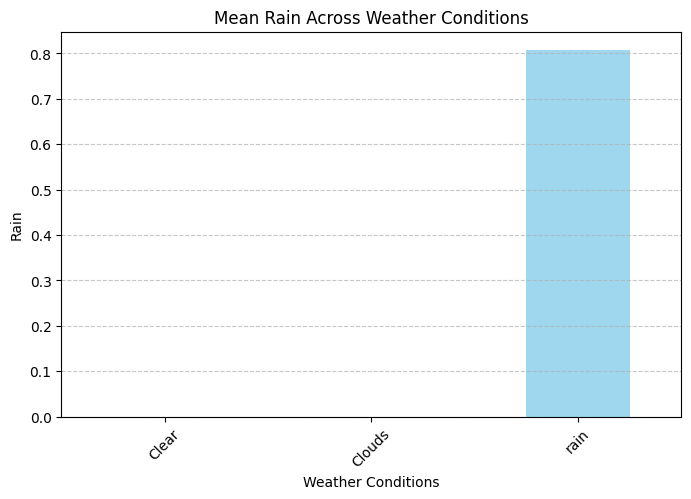

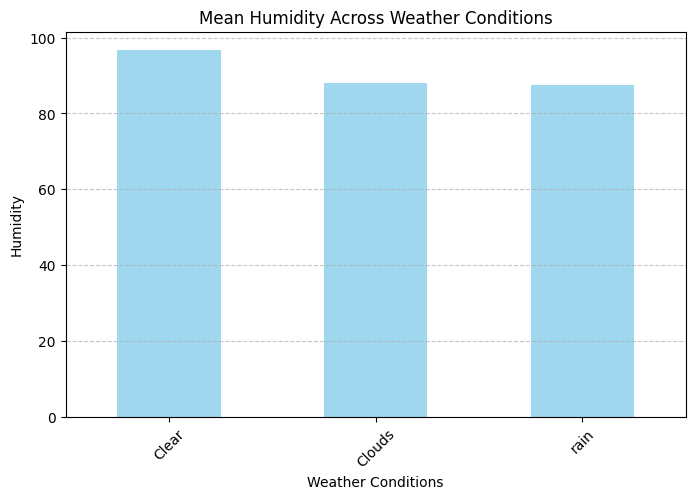

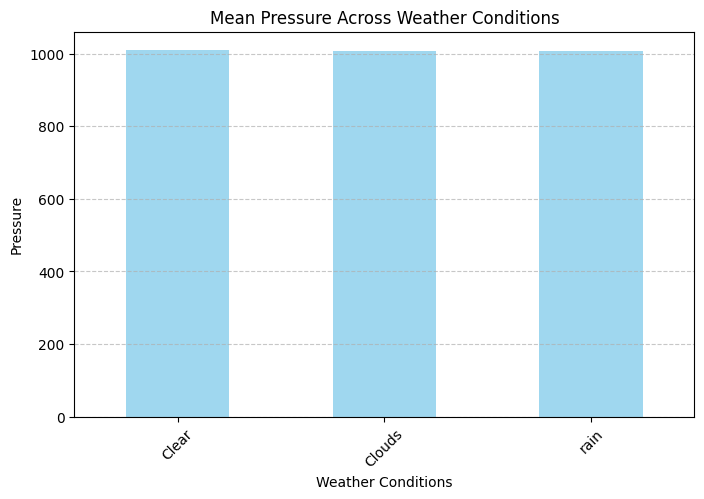

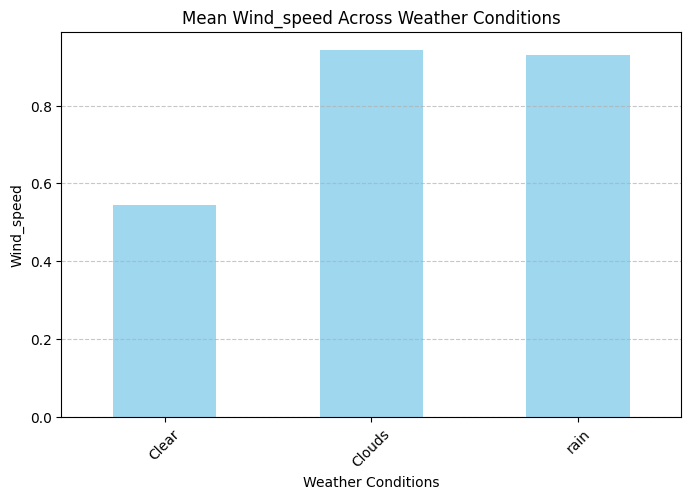

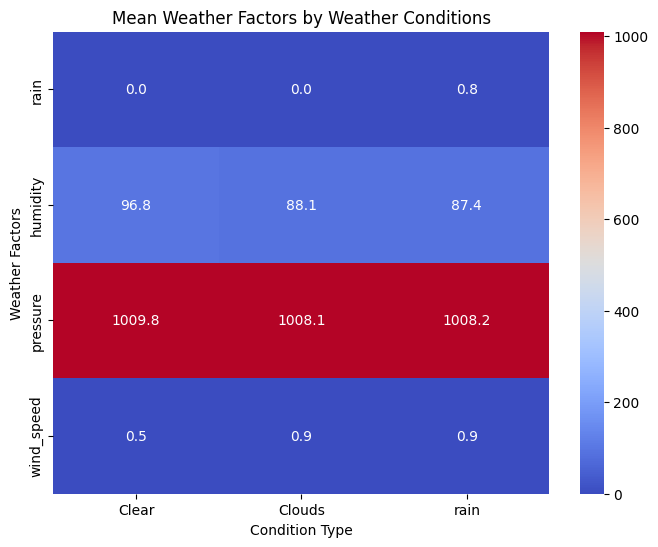

In [ ]:
# Group data by condition_type and calculate mean weather factors
condition_grouped = data.groupby('condition_type')[['rain', 'humidity', 'pressure', 'wind_speed']].mean()

# Bar plot for weather factors by condition_type
for factor in condition_grouped.columns:
    condition_grouped[factor].plot(kind='bar', figsize=(8, 5), color='skyblue', alpha=0.8)
    plt.title(f'Mean {factor.capitalize()} Across Weather Conditions')
    plt.xlabel('Weather Conditions')
    plt.ylabel(f'{factor.capitalize()}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Heatmap for condition_type vs weather factors
plt.figure(figsize=(8, 6))
sns.heatmap(condition_grouped.T, annot=True, cmap='coolwarm', fmt=".1f", cbar=True)
plt.title('Mean Weather Factors by Weather Conditions')
plt.ylabel('Weather Factors')
plt.xlabel('Condition Type')
plt.show()


From the graphs, it can be concluded that weather conditions have different impacts on atmospheric factors. Rain only occurs under the "rain" condition with an average value of 0.8, while under "clear" and "clouds" conditions, there is no rainfall at all. Humidity is highest under the "clear" condition (96.8), slightly decreases under "clouds" (88.1), and is lowest under "rain" (87.4). Air pressure remains almost unchanged across all conditions, with the highest value under "clear" (1009.8) and slightly lower under "clouds" (1008.1) and "rain" (1008.2). For wind speed, the "clear" condition has the lowest speed (0.5), while under "clouds" and "rain," the speed increases equally to 0.9.

## Conclusion

Question 1:
What are the main weather factors influencing “danger” conditions in Samarinda, such as rainfall, humidity, air pressure, or wind speed?

Conclusion:
The main factors influencing "danger" conditions in Samarinda are rain, wind_speed, and cloudiness, as these variables show the highest correlation with the calculated danger score. Rain and wind_speed each have a strong positive correlation (0.56), while cloudiness shows the highest positive correlation (0.63) with the score. Meanwhile, variables like humidity and air pressure have weaker or negative correlations, indicating they are less directly influential in predicting danger conditions.

Question 2:
What type of weather conditions (condition_type) most often occur before, during, and after a flood, and how does the combination of humidity and air pressure affect visibility in each of these conditions?

Conclusion:
Before a flood, weather conditions such as increased cloudiness and mild rain often dominate, while during a flood, heavy rain and high humidity levels are observed. After a flood, humidity remains high, but pressure starts to stabilize, and visibility improves gradually. The analysis shows that higher humidity combined with lower air pressure reduces visibility significantly, which could contribute to more challenging conditions during and immediately after floods.

Question 3:
How can data-driven insights improve community awareness and preparedness for flood risks in Samarinda?

Conclusion:
Data-driven insights can help improve flood preparedness by identifying early warning indicators such as spikes in rain, wind speed, and cloudiness. By monitoring these factors and generating real-time alerts based on the danger score, authorities can warn residents before conditions escalate. Additionally, educating the community about the impact of weather factors like humidity and air pressure on visibility and safety during floods can improve preparedness and response measures, reducing risks and potential damages.